# Linear Regression

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DS-Data/50_Startups - 50_Startups.csv')


In [9]:
!wget https://github.com/YUN-CHIEN-LO/4th-ML100Days/blob/master/datas/application_train.csv

--2023-02-17 14:12:26--  https://github.com/YUN-CHIEN-LO/4th-ML100Days/blob/master/datas/application_train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘application_train.csv’

application_train.c     [ <=>                ] 134.98K  --.-KB/s    in 0.04s   

2023-02-17 14:12:26 (3.54 MB/s) - ‘application_train.csv’ saved [138217]



In [ ]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Model Building

In [ ]:
df1= df
df1 = pd.concat( [df,pd.get_dummies(df.State)],  axis=1, join="inner")
df1 = df1.drop(["State"], axis=1)
df1.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
X = df1.drop('Profit', axis=1)
y = df1['Profit']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.3, random_state=100)


In [ ]:
X.shape,y.shape, xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50, 6), (50,), (35, 6), (35,), (15, 6), (15,))

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
lr.coef_, lr.feature_names_in_

(array([ 8.40871560e-01, -2.79427483e-02,  2.27662305e-02,  2.85868626e+03,
        -4.26072536e+02, -2.43261372e+03]),
 array(['R&D Spend', 'Administration', 'Marketing Spend', 'California',
        'Florida', 'New York'], dtype=object))

In [ ]:
import statsmodels.api as sm
from scipy import stats

xtrain2 = sm.add_constant(xtrain)
lr2 = sm.OLS(ytrain, xtrain2)
lr2 = lr2.fit()
print(lr2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.87e-20
Time:                        06:43:38   Log-Likelihood:                -359.27
No. Observations:                  35   AIC:                             730.5
Df Residuals:                      29   BIC:                             739.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.602e+04   5201.898     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
xtrain3= xtrain.drop("Administration", axis=1)

import statsmodels.api as sm
from scipy import stats

xtrain4 = sm.add_constant(xtrain3)
lr3 = sm.OLS(ytrain, xtrain4)
lr3 = lr3.fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.36e-21
Time:                        06:43:38   Log-Likelihood:                -359.43
No. Observations:                  35   AIC:                             728.9
Df Residuals:                      30   BIC:                             736.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.359e+04   2170.048     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Logistic Regression

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DS-Data/pima_indian_diabetes.csv')

In [ ]:
df2.head(5)

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [ ]:
X = df2.drop('Diabetes', axis=1)
y = df2['Diabetes']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.3, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [ ]:
xtrain_sc = st.fit_transform(xtrain)
xtrain_sc = pd.DataFrame(xtrain_sc, columns=xtrain.columns, index= xtrain.index)

In [ ]:
xtrain_sc.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
count,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02
mean,3.889832e-17,-5.186443e-17,-3.533265e-16,-1.004873e-16,6.483054e-18,6.158901e-16,-5.267482e-17
std,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00
min,-1.011151e+00,-2.157727e+00,-3.313046e+00,-2.077303e+00,-1.190826e+00,-2.108294e+00,-9.381786e-01
25%,-6.970296e-01,-7.622751e-01,-7.258723e-01,-8.268226e-01,-6.744984e-01,-6.569955e-01,-7.352891e-01
50%,-3.829077e-01,-1.132279e-01,1.770420e-03,-1.033313e-03,-2.770080e-01,-1.120457e-03,-4.309550e-01
75%,5.594579e-01,6.656287e-01,7.294132e-01,7.539740e-01,2.721025e-01,5.605598e-01,4.820476e-01
max,4.328920e+00,2.385604e+00,3.154889e+00,2.924620e+00,5.619783e+00,4.715598e+00,3.322500e+00


In [ ]:
import statsmodels.api as sm
from scipy import stats

xtrain_sc2 = sm.add_constant(xtrain_sc)
logr3 = sm.GLM(ytrain, xtrain_sc2)
logr3 = logr3.fit()
print(logr3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.15119
Method:                          IRLS   Log-Likelihood:                -125.90
Date:                Sun, 14 Aug 2022   Deviance:                       40.216
Time:                        06:43:39   Pearson chi2:                     40.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3358      0.02

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Instantiate a gamma family model with the default link function.
#gamma_model = sm.GLM(ytrain, xtrain_sc2, family=sm.families.Gaussian())
gamma_model = sm.GLM(ytrain, xtrain_sc2, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                          3.9089
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 14 Aug 2022   Deviance:                       13472.
Time:                        06:43:39   Pearson chi2:                 1.04e+03
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2671      0.64

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logr4 = LogisticRegression()
#Select best feature 
rfe = RFE(logr4, n_features_to_select= 5)
rfe = rfe.fit(xtrain_sc2, ytrain)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
xtrain_sc2.columns[rfe.support_]

[False  True  True False  True False  True  True]
[4 1 1 3 1 2 1 1]


Index(['No_Times_Pregnant', 'Plasma_Glucose', 'Triceps', 'BMI', 'Age'], dtype='object')

# Clustering

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/DS-Data/HelpInternational-Country-data.csv')

In [ ]:
df3.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df3.shape

(167, 11)

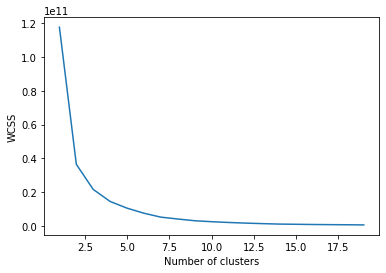

In [ ]:
# X = df3.iloc[:, [3, 4]].values

from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3.iloc[:,1:]) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.cluster import KMeans as km

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


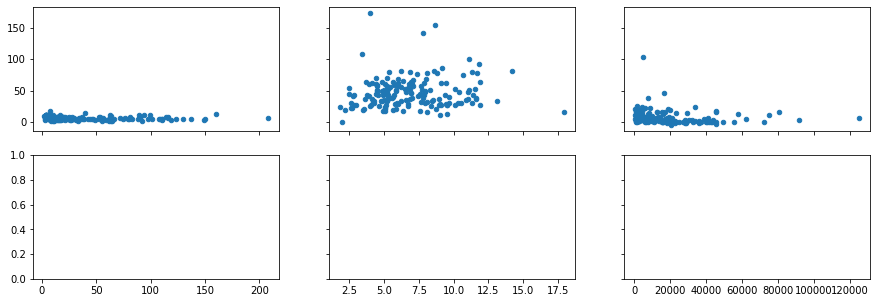

In [ ]:
from IPython.core.pylabtools import figsize
#plt.subplots(figsize=(3, 2))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,5))

ax[0][0].scatter(df3.loc[:, 'child_mort'], df3.loc[:, 'health'], s=20);
ax[0][1].scatter(df3.loc[:, 'health'], df3.loc[:, 'imports'], s=20);
ax[0][2].scatter(df3.loc[:, 'income'], df3.loc[:, 'inflation'], s=20);
plt.show()

In [ ]:
kmeans = km(n_clusters=10)
kmeans.fit(df3.iloc[:,1:])
y_kmeans = kmeans.predict(df3.iloc[:,1:])

In [ ]:
y_kmeans

array([3, 6, 6, 3, 0, 0, 6, 1, 1, 0, 7, 8, 3, 0, 0, 1, 6, 3, 3, 3, 6, 6,
       0, 5, 0, 3, 3, 3, 3, 1, 3, 3, 3, 0, 6, 6, 3, 3, 3, 6, 3, 0, 7, 7,
       1, 6, 6, 6, 6, 8, 3, 0, 6, 1, 1, 0, 3, 6, 1, 3, 7, 6, 6, 3, 3, 3,
       3, 0, 1, 3, 6, 0, 6, 1, 7, 7, 6, 1, 6, 0, 3, 3, 5, 3, 3, 0, 0, 3,
       3, 8, 0, 9, 6, 3, 3, 0, 6, 3, 7, 3, 0, 3, 3, 6, 6, 6, 3, 3, 6, 3,
       1, 7, 3, 3, 4, 8, 3, 0, 6, 6, 3, 0, 7, 2, 0, 0, 3, 3, 8, 3, 6, 0,
       3, 5, 0, 7, 3, 6, 7, 7, 6, 6, 3, 0, 1, 4, 3, 3, 6, 3, 3, 3, 6, 0,
       6, 3, 6, 5, 1, 1, 0, 3, 3, 0, 3, 3, 3], dtype=int32)

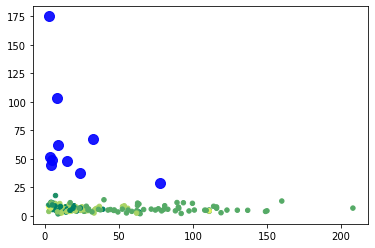

In [ ]:
plt.scatter(df3.loc[:, 'child_mort'], df3.loc[:, 'health'], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

In [ ]:
centers.shape

(10, 10)

In [ ]:
df3['ClusterId'] = y_kmeans

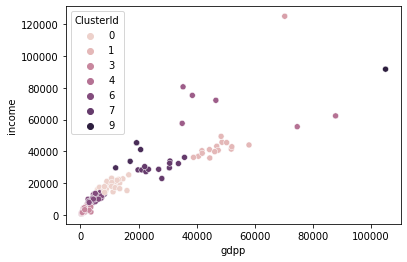

In [ ]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterId',data=df3)
plt.show()

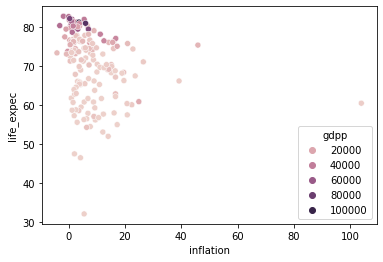

In [ ]:
sns.scatterplot(x='inflation',y='life_expec',hue='gdpp',data=df3)
plt.show()

In [ ]:
df3.groupby('ClusterId').count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterId,,,,,,,,,,
0,29,29,29,29,29,29,29,29,29,29
1,15,15,15,15,15,15,15,15,15,15
2,1,1,1,1,1,1,1,1,1,1
3,61,61,61,61,61,61,61,61,61,61
4,2,2,2,2,2,2,2,2,2,2
5,4,4,4,4,4,4,4,4,4,4
6,37,37,37,37,37,37,37,37,37,37
7,12,12,12,12,12,12,12,12,12,12
8,5,5,5,5,5,5,5,5,5,5


In [ ]:
df3.loc[ df3['ClusterId']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1
